In [31]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
import scipy.integrate as sct
from scipy.special import roots_legendre

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Diego Felipe Diaz Perez
*Métodos computacionales*

---

#1

Encuentre las integrales

$$\int_0^{\pi/4}  e^{3x}\cdot \sin(x) \, dx$$

---

$$\int_e^{1+e} \frac{1}{x\ln x} \, dx$$

---

* Usando los métodos Trapezoidal y de Simpson. Evalue la convergencia en función del valor de $h$, para esto haga un gráfico logaritmico del error absoluto tomando como valor exacto el dado por `quad`.

* Luego, realice un estudio de la convergencia para `fixed_quad`.






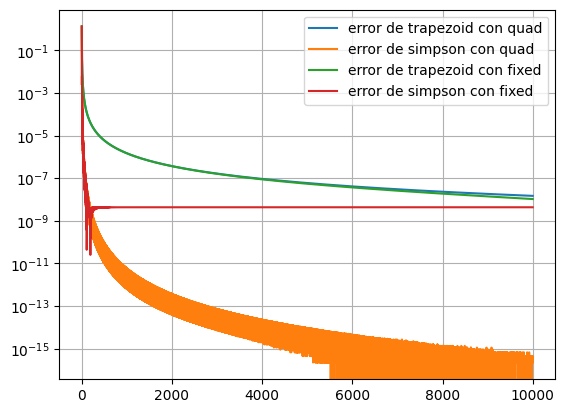

In [32]:
#a.1
f=lambda x: np.exp(3*x)*np.sin(x)
tra=[]
sim=[]
ejex=[]
for i in range(2,10000):
  ejex.append(i)
  x=np.linspace(0,np.pi/4,i)
  y=f(x)
  tra.append(sct.trapezoid(y,x))
  sim.append(sct.simpson(y,x))
cua=sct.quad(f,0,np.pi/4)[0]
tra=np.array(tra)
sim=np.array(sim)
f_cua=sct.fixed_quad(f,0,np.pi/4)[0]
errtf=abs(f_cua-tra)
errsf=abs(f_cua-sim)
errt=abs(cua-tra)
errs=abs(cua-sim)
plt.semilogy(ejex,errt,label="error de trapezoid con quad")
plt.semilogy(ejex,errs,label="error de simpson con quad")
plt.semilogy(ejex,errtf,label="error de trapezoid con fixed")
plt.semilogy(ejex,errsf,label="error de simpson con fixed")
plt.grid()
plt.legend()

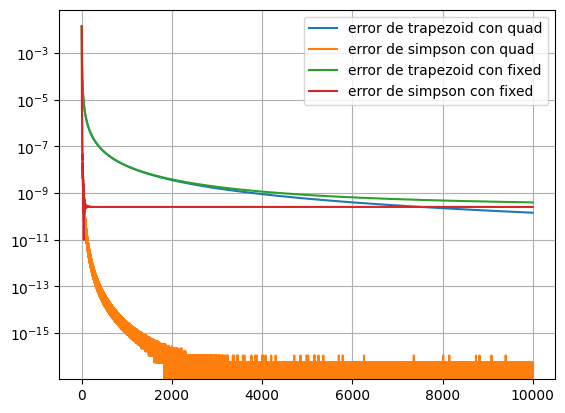

In [33]:
#b
f=lambda x: 1/(x*np.log(x))
tra=[]
sim=[]
ejex=[]
for i in range(2,10000):
  ejex.append(i)
  x=np.linspace(np.e,np.e+1,i)
  y=f(x)
  tra.append(sct.trapezoid(y,x))
  sim.append(sct.simpson(y,x))
cua=sct.quad(f,np.e,np.e+1)[0]
tra=np.array(tra)
sim=np.array(sim)
f_cua=sct.fixed_quad(f,np.e,np.e+1)[0]
errtf=abs(f_cua-tra)
errsf=abs(f_cua-sim)
errt=abs(cua-tra)
errs=abs(cua-sim)
plt.semilogy(ejex,errt,label="error de trapezoid con quad")
plt.semilogy(ejex,errs,label="error de simpson con quad")
plt.semilogy(ejex,errtf,label="error de trapezoid con fixed")
plt.semilogy(ejex,errsf,label="error de simpson con fixed")
plt.grid()
plt.legend()

#2

* Resuelva la siguiente integral usando `quad`. Compare su respuesta con `tlquad`

$$
\int_0^\pi \int_0^x \int_0^{xy} \frac{1}{y}\sin\frac{z}{y}\, dz dy dx
$$

In [34]:
def z(y,x):
  f=lambda z: (1/y)*np.sin(z/y)
  i=sct.quad(f,0,x*y)[0]
  return i
def y(x):
  f=lambda y: z(y,x)
  i=sct.quad(f,0,x)[0]
  return i
inte=sct.quad(y,0,np.pi)[0]
f=lambda z,y,x: (1/y)*np.sin(z/y)
a,b=0,np.pi
g,h=lambda x: 0, lambda x: x
q,r=lambda x,y: 0, lambda x,y: x*y
cua=sct.tplquad(f,a,b,g,h,q,r)[0]
print("integral por quad:",inte)
print("integral por triple quad:",cua)

integral por quad: 6.934802200544679
integral por triple quad: 6.934802200544679


#3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





In [35]:
def gauss_quad_standard(func,a,b,n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)
    xi = ((b - a)/2)*x+((a + b)/2)
    f=func(xi)
    integral = ((b - a)/2)*np.sum(w*f)
    return integral

In [36]:
def z(y,x,n):
  f=lambda z: (1/y)*np.sin(z/y)
  i=gauss_quad_standard(f,0,x*y,n)
  return i
def y(x,n):
  f=lambda y: z(y,x,n)
  i=gauss_quad_standard(f,0,x,n)
  return i
def x(n):
  f=lambda x: y(x,n)
  i=gauss_quad_standard(f,0,np.pi,n)
  return i
inte=x(20)
print(inte)

9.10733196633681


#4
Usando los métodos trapezoidal, Simpson y cuadratura Gaussiana encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [37]:
#a
f=lambda x: 1/((np.tan(x))**(1/2))
cua=sct.quad(f,0,np.pi/2)
def trapezoide(f,a,b,e=1e-5,m=1000):
  tra1=0
  for i in range(2,m):
    x=np.linspace(a,b,i)
    y=f(x)
    tra=sct.trapezoid(y,x)
    if abs(tra-tra1)<1e-5:
      return tra
    else:
      tra1=tra
  return print("maximo de iteraciones")
def simpson(f,a,b,e,m):
  sim1=0
  for i in range(2,m):
    x=np.linspace(a,b,i)
    y=f(x)
    sim=sct.trapezoid(y,x)
    if abs(sim-sim1)<1e-5:
      return sim
    else:
      sim1=sim
  return print("maximo de iteraciones")
tra=trapezoide(f,1e-9,np.pi/2,1e-5,100000)
sim=simpson(f,1e-9,np.pi/2,1e-5,100000)
print("trapezoide:",tra)
print("simpson:",sim)
print("quad:",cua)

trapezoide: 2.713638085182814
simpson: 2.713638085182814
quad: (2.2214414690792026, 4.1406478246130973e-10)


In [38]:
#b
f=lambda x: np.cos(x)/(x**3)
cua=sct.quad(f,1,np.inf)
a=1
b=1e4 # dado que lo de abajo se vuelve muy pero muy grande comparado con lo de arriba que solo puede estar entre -1 y 1
tra=trapezoide(f,a,b,1e-5,100000)
sim=simpson(f,a,b,1e-5,100000)
print("quad:",cua)
print("trapezoide:",tra)
print("simpson:",sim)

/tmp/ipython-input-38-1078345355.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  cua=sct.quad(f,1,np.inf)


quad: (0.01811792007976691, 1.4789016823564538e-06)
trapezoide: 0.10079570341340949
simpson: 0.10079570341340949


In [39]:
#c
def f(y):
  return 1/((1 - y**2)**(1/2))
tra1=0
for i in range(2,10000):
  x_v = np.linspace(0, np.pi/4, i)
  inte= []
  for x in x_v:
    y_v= np.linspace(0, np.sin(x), i)
    fy = f(y_v)
    inte.append(sct.trapezoid(fy, y_v))
  tra= sct.trapezoid(inte, x_v)
  if abs(tra-tra1)<1e-5:
    print("trapezoide:",tra)
    break
  else:
    tra1=tra
sim1=0
for i in range(2,10000):
  x_v = np.linspace(0, np.pi/4, i)
  inte= []
  for x in x_v:
    y_v= np.linspace(0, np.sin(x), i)
    fy = f(y_v)
    inte.append(sct.simpson(fy, y_v))
  sim= sct.simpson(inte, x_v)
  if abs(sim-sim1)<1e-5:
    print("simpson:",sim)
    break
  else:
    sim1=sim
f=lambda x,y: 1/((1 - y**2)**(1/2))
a,b=0,np.pi/4
g,h=lambda x: 0,lambda x: np.sin(x)
print("quad:",sct.dblquad(f,a,b,g,h))

trapezoide: 0.3084824147277155
simpson: 0.30843300980398924
quad: (0.36033449485443175, 2.086185191196123e-11)
